# Churn Model Prediction

In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('datasets/Churn_Modelling.csv')

x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
gender=pd.get_dummies(x['Gender'],drop_first=True)
geography=pd.get_dummies(x['Geography'],drop_first=True)

In [10]:
x=pd.concat([x,gender,geography],axis=1)
x=x.drop(['Gender','Geography'],axis=1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

model.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

print(history.history.keys())

Epoch 1/10
536/536 [==============================] - 4s 6ms/step - loss: 0.7377 - accuracy: 0.5354 - val_loss: 0.6183 - val_accuracy: 0.7686
Epoch 2/10
536/536 [==============================] - 3s 5ms/step - loss: 0.5796 - accuracy: 0.7848 - val_loss: 0.5393 - val_accuracy: 0.8020
Epoch 3/10
536/536 [==============================] - 3s 5ms/step - loss: 0.5340 - accuracy: 0.7942 - val_loss: 0.5085 - val_accuracy: 0.8054
Epoch 4/10
536/536 [==============================] - 3s 5ms/step - loss: 0.5101 - accuracy: 0.7938 - val_loss: 0.4898 - val_accuracy: 0.8058
Epoch 5/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4927 - accuracy: 0.7942 - val_loss: 0.4768 - val_accuracy: 0.8046
Epoch 6/10
536/536 [==============================] - 3s 6ms/step - loss: 0.4801 - accuracy: 0.7947 - val_loss: 0.4679 - val_accuracy: 0.8054
Epoch 7/10
536/536 [==============================] - 3s 6ms/step - loss: 0.4703 - accuracy: 0.7966 - val_loss: 0.4607 - val_accuracy: 0.8050
Epoch 

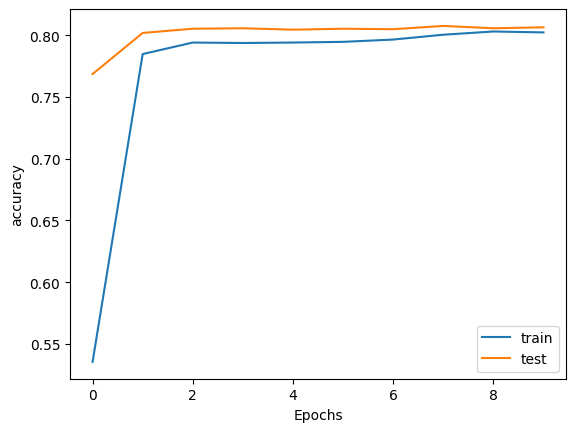

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

[]

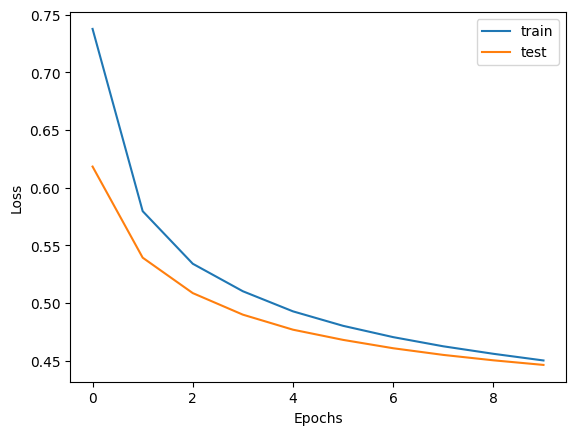

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.plot()

In [17]:
y_pred=model.predict(x_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.09243824],
       [0.10777617],
       [0.1861112 ],
       ...,
       [0.10309603],
       [0.2205081 ],
       [0.29734063]], dtype=float32)

In [18]:
y_pred=(y_pred>0.5)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))

0.805


In [20]:
print(confusion_matrix(y_pred,y_test))

[[1547  356]
 [  34   63]]


In [21]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.8050


[0.4544921815395355, 0.8050000071525574]